## <center>CITS5508 Assignment3</center>

**By: Adharsh Sundaram Soudakar(23796349)**<br>

**importing necessary packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

**Reading the dataset:**

In [2]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\adhar\Desktop\sem3\cits5508\assignment_3\housingCalifornia.csv")

In [3]:
data

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


**Exploratory data analysis and preprocessing:**

**D1(a) Histogram:**

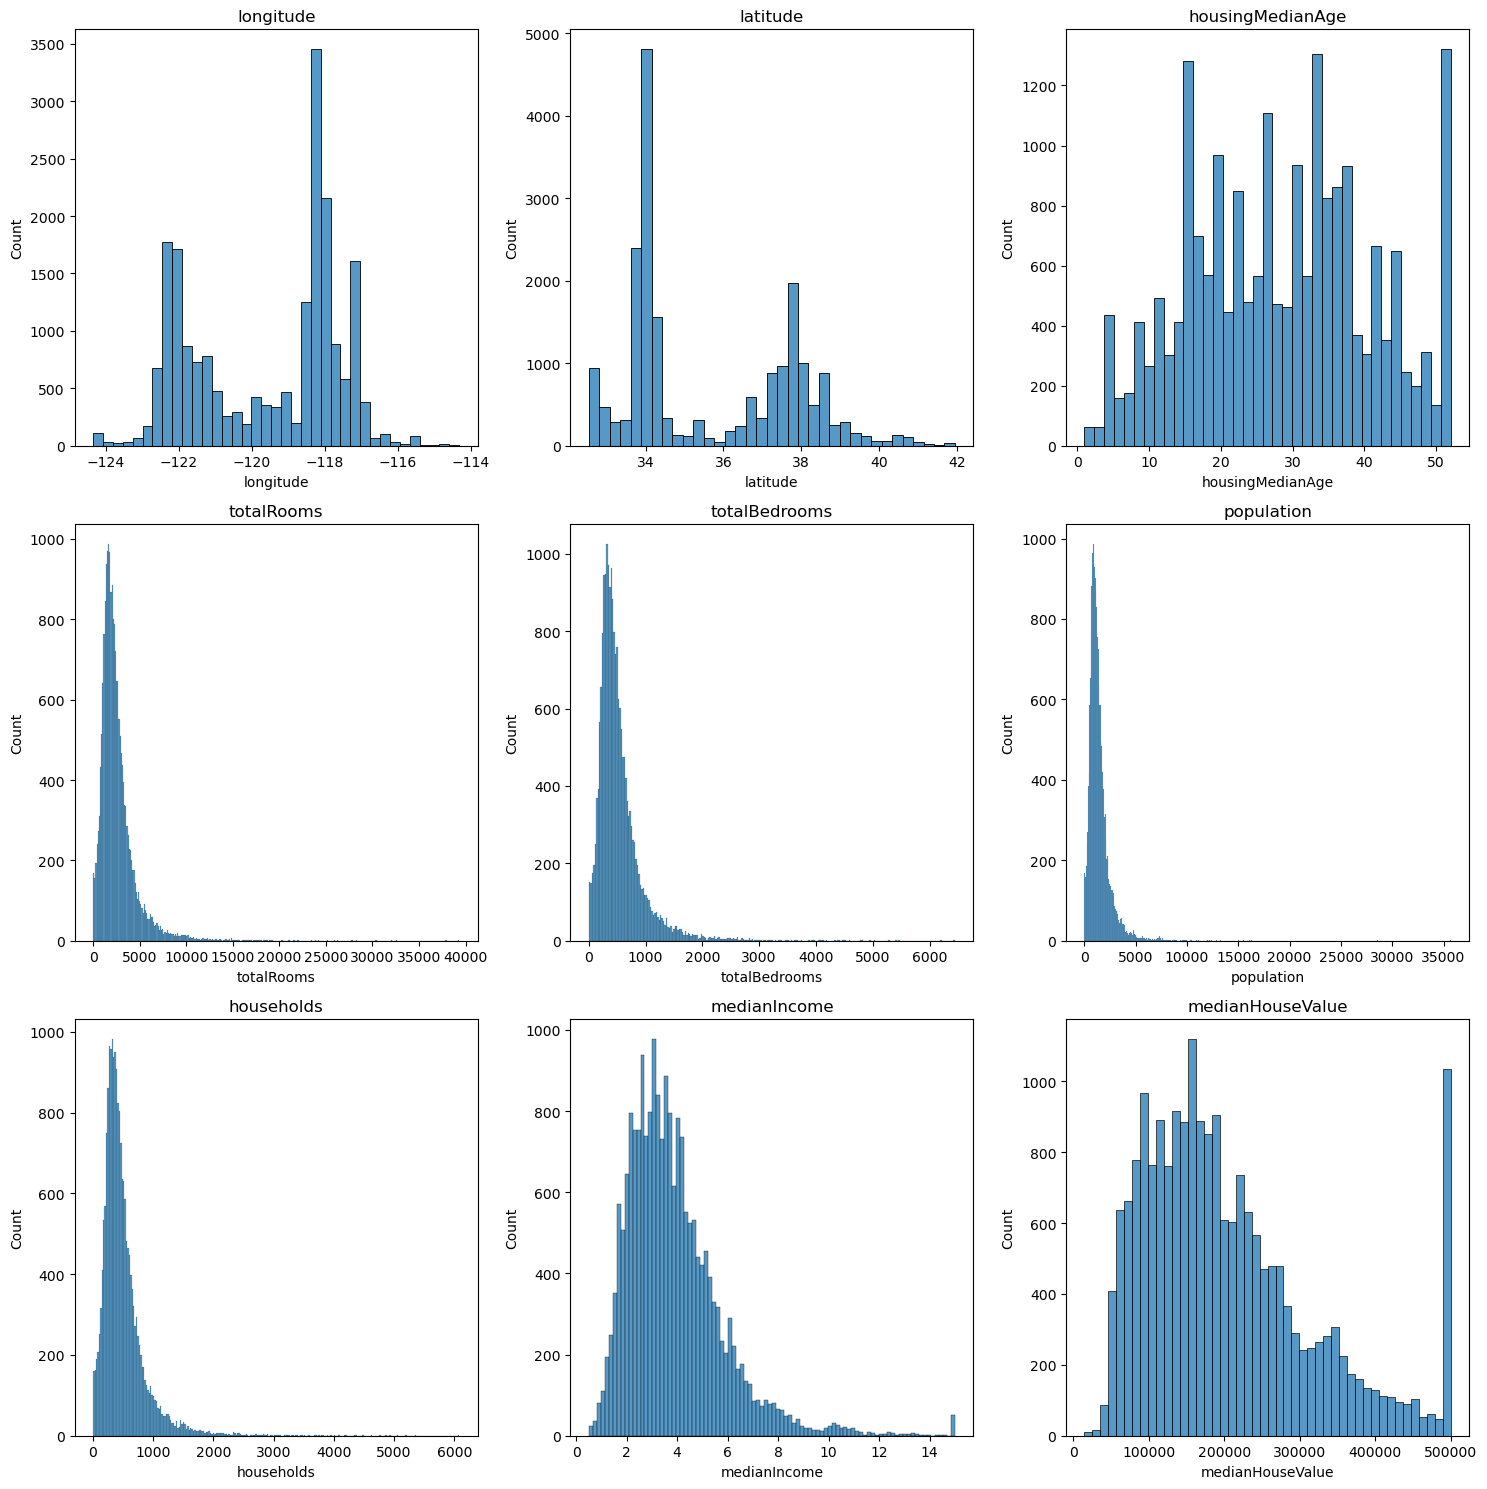

In [4]:
# Defining the non-categorical features and the target variable
feature_set1 = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 
            'population', 'households', 'medianIncome', 'medianHouseValue']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flattening the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(feature_set1):
    sns.histplot(data[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

**D1 (b) Correlation Matrix:**

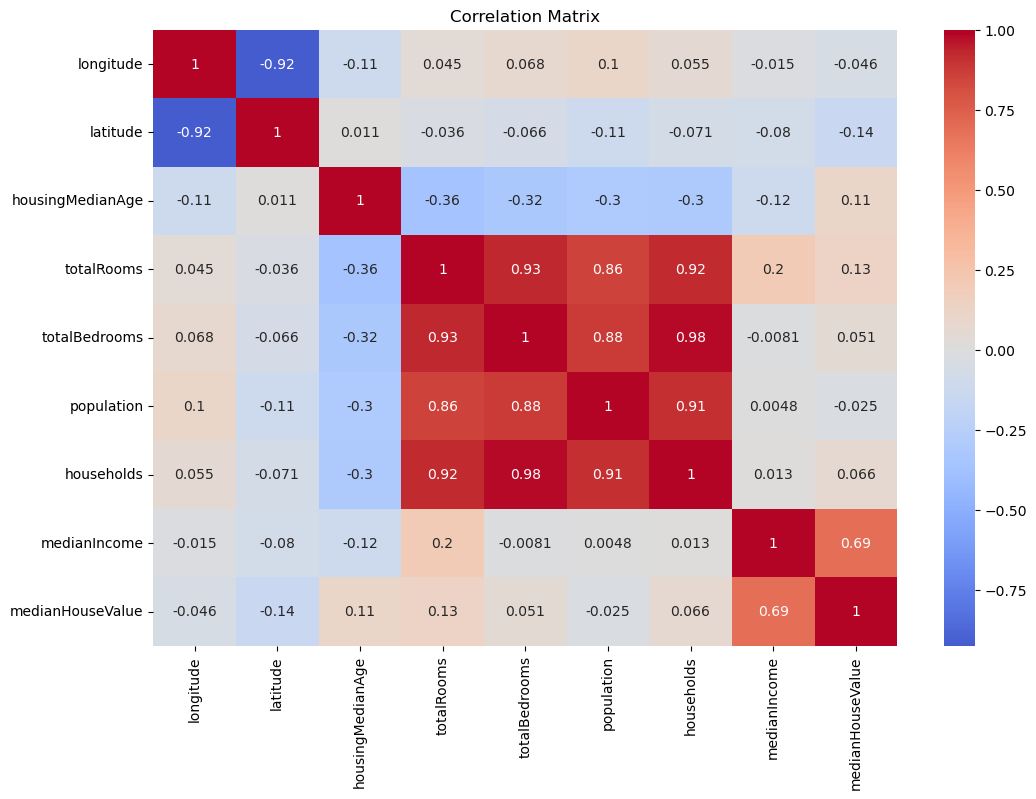

In [168]:
corr_data = data.drop(columns=['oceanProximity'])

correlation_matrix = corr_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

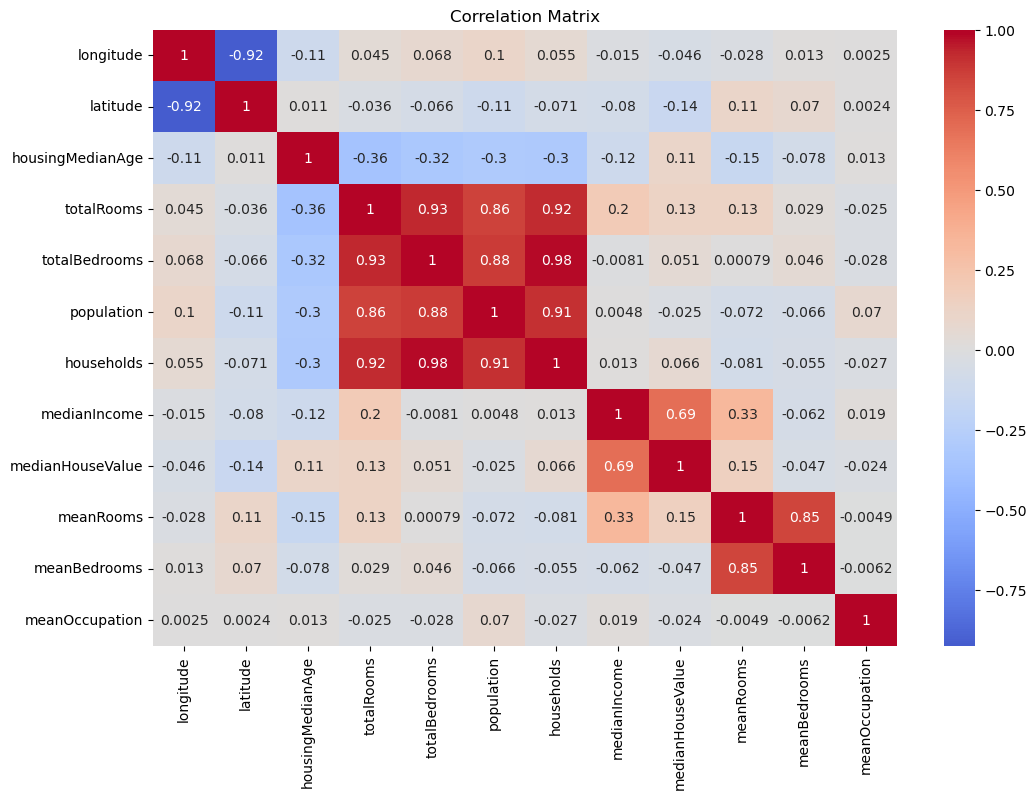

                  longitude  latitude  housingMedianAge  totalRooms  \
longitude          1.000000 -0.924664         -0.108197    0.044568   
latitude          -0.924664  1.000000          0.011173   -0.036100   
housingMedianAge  -0.108197  0.011173          1.000000   -0.361262   
totalRooms         0.044568 -0.036100         -0.361262    1.000000   
totalBedrooms      0.068378 -0.066318         -0.320485    0.929893   
population         0.099773 -0.108785         -0.296244    0.857126   
households         0.055310 -0.071035         -0.302916    0.918484   
medianIncome      -0.015176 -0.079809         -0.119034    0.198050   
medianHouseValue  -0.045967 -0.144160          0.105623    0.134153   
meanRooms         -0.027540  0.106389         -0.153277    0.133798   
meanBedrooms       0.013344  0.069721         -0.077747    0.029494   
meanOccupation     0.002476  0.002366          0.013191   -0.024581   

                  totalBedrooms  population  households  medianIncome  \
lon

In [5]:
# Create the new features
data['meanRooms'] = data['totalRooms'] / data['households']
data['meanBedrooms'] = data['totalBedrooms'] / data['households']
data['meanOccupation'] = data['population'] / data['households']

cor_data = data.drop(columns=['oceanProximity'])

correlation_matrix = cor_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)


**D1 (c) Scatter plot:**

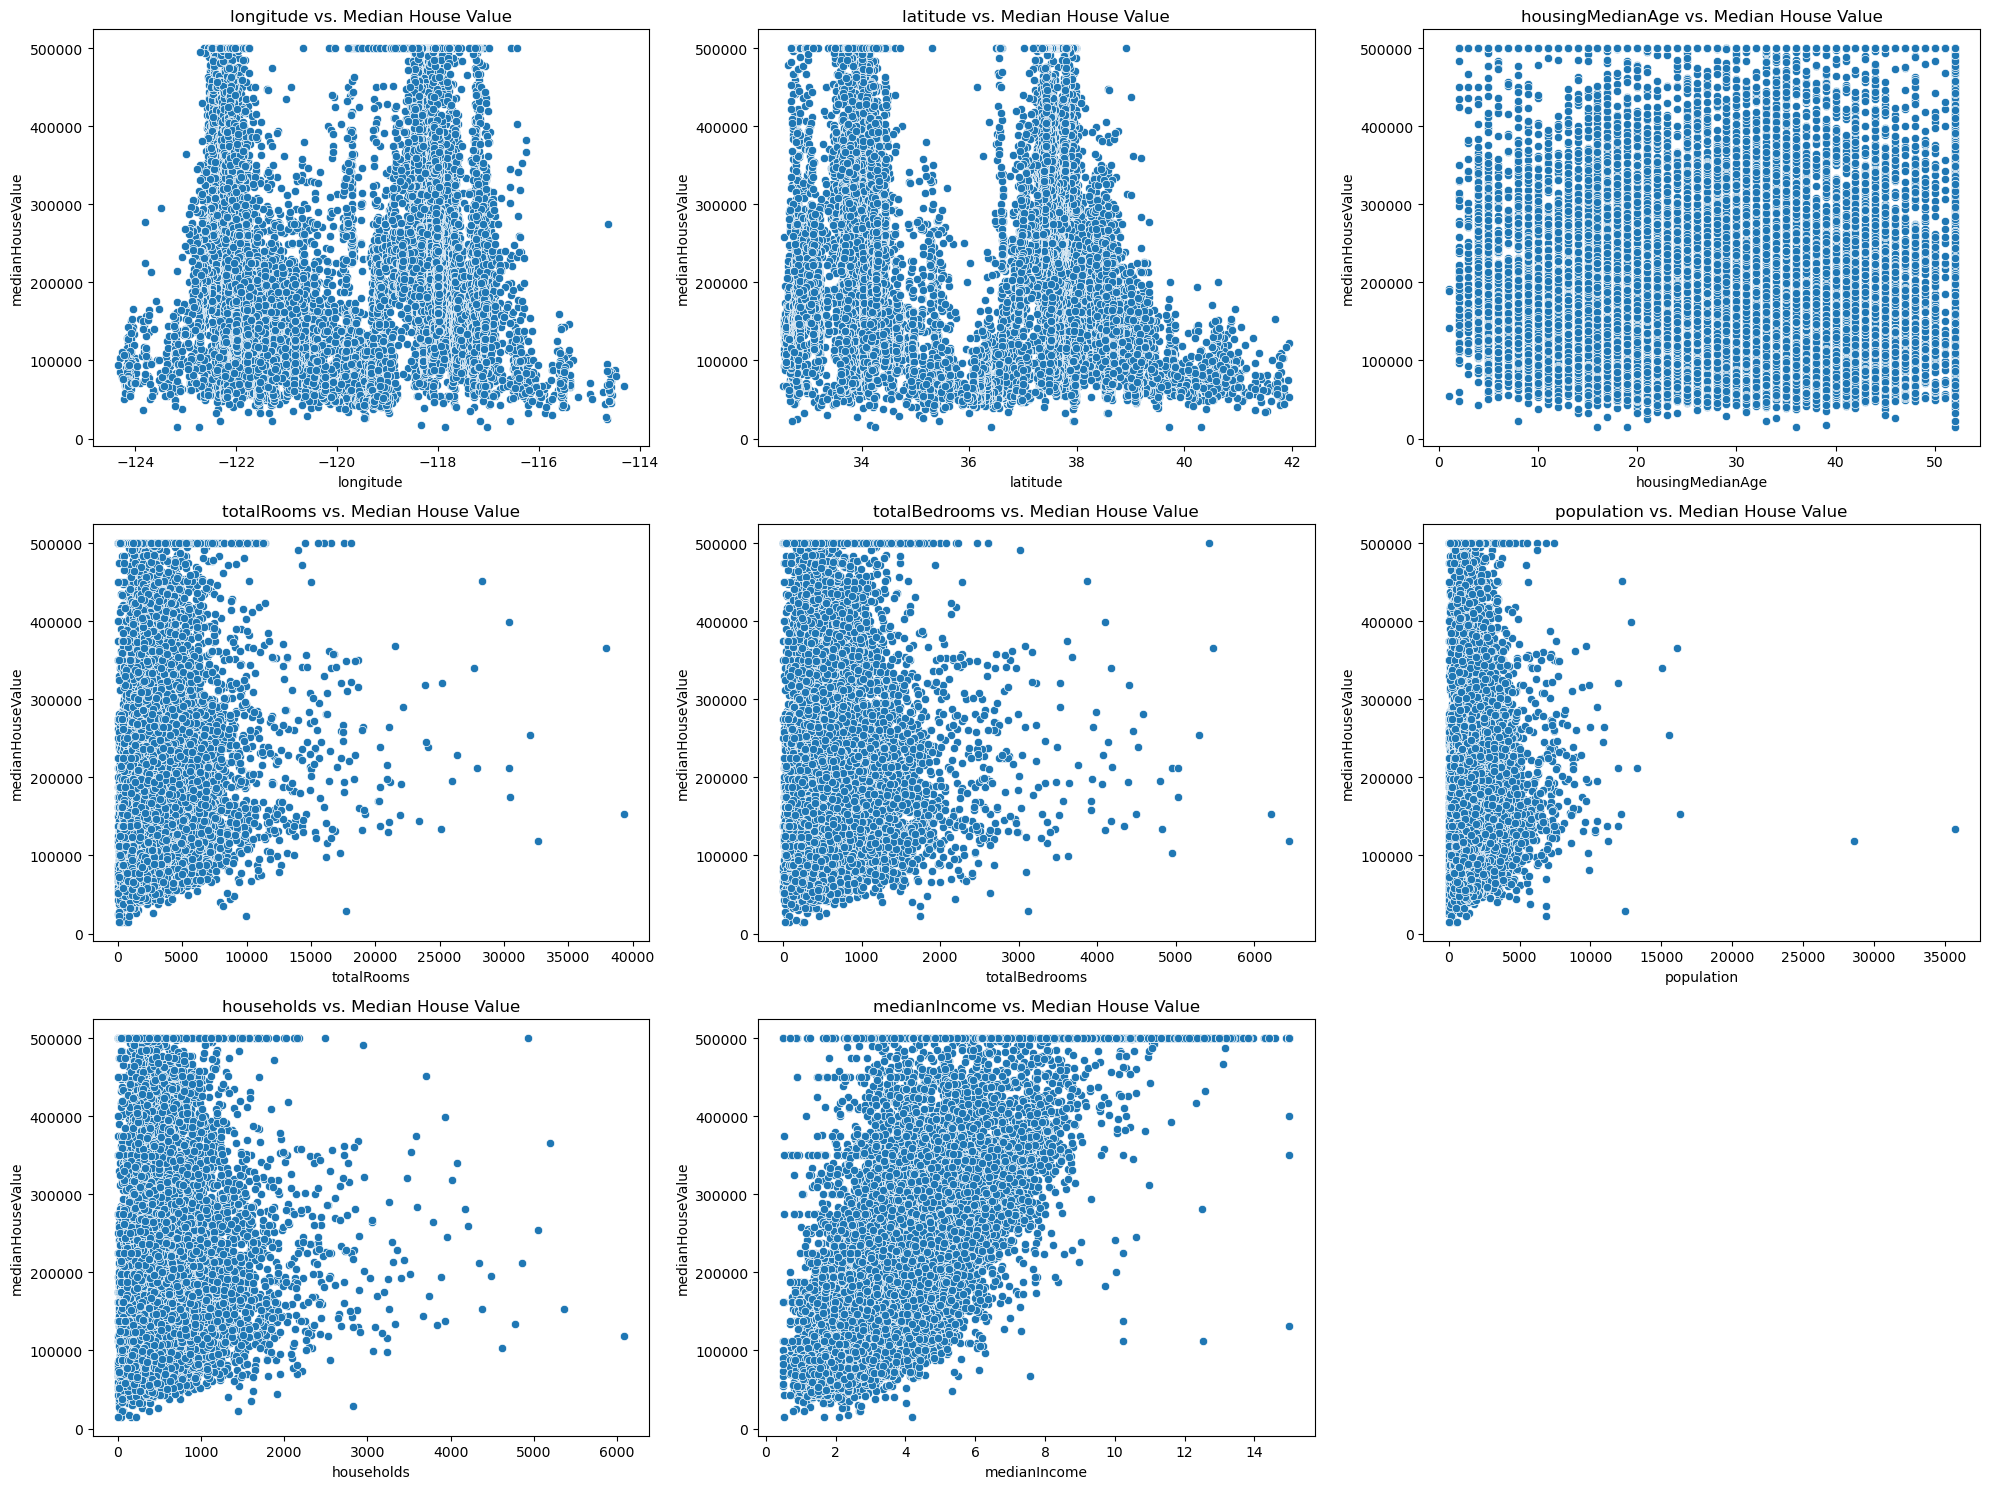

In [169]:
feature_set2 = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 
            'population', 'households', 'medianIncome']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(feature_set2):
    sns.scatterplot(data=data, x=feature, y='medianHouseValue', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Median House Value')

# Remove the last empty subplot
if len(feature_set2) < len(axes):
    fig.delaxes(axes[len(feature_set2)])

plt.tight_layout()
plt.show()

**Performing data transformations (data1 and data2):**

In [170]:
# Encoding the categorical variable
data1 = pd.get_dummies(data, columns=['oceanProximity'], drop_first=True)

# Creating data2 (same as data1, but with the transformed target variable)
data2 = data1.copy()
data2['medianHouseValue'] = data2['medianHouseValue'] / 100000  # Transform to hundreds of thousands

**Splitting the data, training the models and obtaining results:**

In [171]:
# Splitting data1 and data2 into training and test sets
X1 = data1.drop('medianHouseValue', axis=1)
y1 = data1['medianHouseValue']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=5508)

X2 = data2.drop('medianHouseValue', axis=1)
y2 = data2['medianHouseValue']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=5508)

# Standardizing the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Function to train and evaluate models and calculate RMSE
def train_and_evaluate(X_train, X_test, y_train, y_test):
    results = {}
    
    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_train_pred = lin_reg.predict(X_train)
    y_test_pred = lin_reg.predict(X_test)
    results['Linear Regression'] = {
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    # Lasso Regression with alpha=100
    lasso_reg = Lasso(alpha=100)
    lasso_reg.fit(X_train, y_train)
    y_train_pred = lasso_reg.predict(X_train)
    y_test_pred = lasso_reg.predict(X_test)
    results['Lasso Regression'] = {
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    return results

# Train and evaluate models on original and standardized datasets
results = {
    'data1_original': train_and_evaluate(X1_train, X1_test, y1_train, y1_test),
    'data1_standardized': train_and_evaluate(X1_train_scaled, X1_test_scaled, y1_train, y1_test),
    'data2_original': train_and_evaluate(X2_train, X2_test, y2_train, y2_test),
    'data2_standardized': train_and_evaluate(X2_train_scaled, X2_test_scaled, y2_train, y2_test)
}

**D2 (a) Displaying the results:**

In [172]:
# Create a table to display the RMSE results
table_data = []
for key, value in results.items():
    row = [key]
    for model, metrics in value.items():
        row.extend([metrics['RMSE_train'], metrics['RMSE_test']])
    table_data.append(row)

# Create DataFrame for better visualization
columns = ['Dataset', 'LinReg RMSE Train', 'LinReg RMSE Test', 'Lasso RMSE Train', 'Lasso RMSE Test']
rmse_table = pd.DataFrame(table_data, columns=columns)

# Print the table
print(rmse_table)

              Dataset  LinReg RMSE Train  LinReg RMSE Test  Lasso RMSE Train  \
0      data1_original       68607.314131      68589.312340      68660.504643   
1  data1_standardized       68607.314131      68589.312340      68615.441095   
2      data2_original           0.686073          0.685893          1.129396   
3  data2_standardized           0.686073          0.685893          1.156303   

   Lasso RMSE Test  
0     68601.809500  
1     68623.383563  
2         1.119761  
3         1.144382  


**Creating dataset data3**:

In [173]:
# Create the new features
data['meanRooms'] = data['totalRooms'] / data['households']
data['meanBedrooms'] = data['totalBedrooms'] / data['households']
data['meanOccupation'] = data['population'] / data['households']

# Create data3 by removing specified columns and adding new features
data3 = data.drop(['totalRooms', 'totalBedrooms', 'households', 'population'], axis=1)
data3['meanRooms'] = data['meanRooms']
data3['meanBedrooms'] = data['meanBedrooms']
data3['meanOccupation'] = data['meanOccupation']

# Transform the target variable to hundreds of thousands of dollars
data3['medianHouseValue'] = data3['medianHouseValue'] / 100000

# Encode the categorical variable
data3 = pd.get_dummies(data3, columns=['oceanProximity'], drop_first=True)

# Split data3 into training and test sets
X3 = data3.drop('medianHouseValue', axis=1)
y3 = data3['medianHouseValue']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=5508)

# Standardize the features
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Train and evaluate models on original and standardized datasets
results = {
    'data3_original': train_and_evaluate(X3_train, X3_test, y3_train, y3_test),
    'data3_standardized': train_and_evaluate(X3_train_scaled, X3_test_scaled, y3_train, y3_test)
}

**D3 (a) Displaying the results:**

In [174]:
# Create a table to display the RMSE results
table_data = []
for key, value in results.items():
    row = [key]
    for model, metrics in value.items():
        row.extend([metrics['RMSE_train'], metrics['RMSE_test']])
    table_data.append(row)

# Create DataFrame for better visualization
columns = ['Dataset', 'LinReg RMSE Train', 'LinReg RMSE Test', 'Lasso RMSE Train', 'Lasso RMSE Test']
rmse_table = pd.DataFrame(table_data, columns=columns)

# Print the table
print(rmse_table)

              Dataset  LinReg RMSE Train  LinReg RMSE Test  Lasso RMSE Train  \
0      data3_original            0.70949           1.13601          1.156303   
1  data3_standardized            0.70949           1.13601          1.156303   

   Lasso RMSE Test  
0         1.144382  
1         1.144382  


**Getting the parameter values for the respective variables of all models:**

In [175]:
# Function to fit models and return coefficients
def fit_and_get_coefficients(X_train, X_test, y_train, y_test):
    results = {}
    
    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    results['Linear Regression'] = lin_reg.coef_
    
    # Lasso Regression with alpha=100
    lasso_reg = Lasso(alpha=100)
    lasso_reg.fit(X_train, y_train)
    results['Lasso Regression'] = lasso_reg.coef_
    
    return results

# Split, standardize, fit models, and get coefficients for each dataset
datasets = {'data1': data1, 'data2': data2, 'data3': data3}
coefficients = {}
all_variable_names = set()

# Collect all variable names from each dataset
variable_names_dict = {}
 
for key, dataset in datasets.items():
    X = dataset.drop('medianHouseValue', axis=1)
    variable_names = X.columns.tolist()
    variable_names_dict[key] = variable_names
    all_variable_names.update(variable_names)
    y = dataset['medianHouseValue']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)
    
    # Original data
    coefficients[f'{key}_original'] = fit_and_get_coefficients(X_train, X_test, y_train, y_test)
    
    # Standardized data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    coefficients[f'{key}_standardized'] = fit_and_get_coefficients(X_train_scaled, X_test_scaled, y_train, y_test)

all_variable_names = list(all_variable_names)

**D3 (c) Reporting the estimated parameter values with the corresponding variable names for all models:**

In [176]:
# Create a DataFrame for better visualization of coefficients
coef_table = pd.DataFrame(columns=['Dataset', 'Model'] + all_variable_names)

rows = []

for dataset_key in coefficients:
    for model in coefficients[dataset_key]:
        # Get the variable names for the current dataset
        current_variable_names = variable_names_dict[dataset_key.split('_')[0]]
        coef_dict = dict(zip(current_variable_names, coefficients[dataset_key][model]))
        
        # Create a row with NaN for all variable names initially
        row = [dataset_key, model] + ['-'] * len(all_variable_names)
        
        # Fill the row with actual coefficients where available
        for var_name, coef in coef_dict.items():
            row[2 + all_variable_names.index(var_name)] = coef
        
        rows.append(row)

# Create the DataFrame using the list of rows
coef_table = pd.DataFrame(rows, columns=['Dataset', 'Model'] + all_variable_names)

# Print the coefficient table
print(coef_table)

               Dataset              Model    totalRooms     longitude  \
0       data1_original  Linear Regression     -6.428986 -26533.237894   
1       data1_original   Lasso Regression     -6.433659 -26398.758516   
2   data1_standardized  Linear Regression -14090.649431 -53194.886029   
3   data1_standardized   Lasso Regression -12015.246255 -50311.456263   
4       data2_original  Linear Regression     -0.000064     -0.265332   
5       data2_original   Lasso Regression      0.000104     -0.000000   
6   data2_standardized  Linear Regression     -0.140906     -0.531949   
7   data2_standardized   Lasso Regression           0.0     -0.000000   
8       data3_original  Linear Regression             -     -0.261440   
9       data3_original   Lasso Regression             -     -0.000000   
10  data3_standardized  Linear Regression             -     -0.524144   
11  data3_standardized   Lasso Regression             -     -0.000000   

      households  oceanProximity_NEAR BAY totalBed

**Training Lasso Regression model:**

In [177]:
# Define the Lasso Regression and GridSearchCV parameters
lasso = Lasso()
param_grid = {'alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Initialize KFold cross-validation with random state
kfold = KFold(n_splits=10, random_state=5508, shuffle=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X3_train_scaled, y3_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']

# RMSE on training set
train_rmse = -grid_search.best_score_

# RMSE on test set
test_rmse = -grid_search.score(X3_test_scaled, y3_test)

# Estimated parameter values with corresponding variable names
parameter_values = grid_search.best_estimator_.coef_
variable_names = X.columns.tolist()

**D4 (a) Reporting the results of Lasso Regression model:**

In [178]:
# Print results
print("Optimal alpha value according to Grid-Search:", best_alpha)
print("RMSE on the training set:", train_rmse)
print("RMSE on the test set:", test_rmse)
print("Estimated parameter values with corresponding variable names:")
for name, value in zip(variable_names, parameter_values):
    print(f"{name}: {value}")

Optimal alpha value according to Grid-Search: 0.001
RMSE on the training set: 0.7349556047180291
RMSE on the test set: 1.1289369063957873
Estimated parameter values with corresponding variable names:
longitude: -0.49611630541903734
latitude: -0.5012955294657502
housingMedianAge: 0.1057843012611856
medianIncome: 0.7882165284935265
meanRooms: -0.18507302607116455
meanBedrooms: 0.22248669879760014
meanOccupation: -0.08665341368090235
oceanProximity_INLAND: -0.18739738891323615
oceanProximity_ISLAND: 0.025861642779502213
oceanProximity_NEAR BAY: 0.018310748710305726
oceanProximity_NEAR OCEAN: 0.02834339996919888


**Training Ridge Regression model:**

In [179]:
# Define the Ridge Regression model
ridge = Ridge()

# Perform Grid-SearchCV to find the optimal regularization parameter
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X3_train_scaled, y3_train)

# Evaluate the model performance
best_alpha = grid_search.best_params_['alpha']
ridge_best = grid_search.best_estimator_
y3_train_pred = ridge_best.predict(X3_train_scaled)
y3_test_pred = ridge_best.predict(X3_test_scaled)
train_rmse = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
test_rmse = np.sqrt(mean_squared_error(y3_test, y3_test_pred))

**D5 (a) Reporting the results of Ridge Regression model:**

In [180]:
# Report the results
print("Optimal alpha value according to the Grid-Search:", best_alpha)
print("RMSE on training set:", train_rmse)
print("RMSE on testing set:", test_rmse)

# Get the estimated parameter values with the corresponding variable names
coef_dict = {}
for coef, var in zip(ridge_best.coef_, variable_names):
    coef_dict[var] = coef

print("Estimated parameter values with corresponding variable names:")
for var, coef in coef_dict.items():
    print(f"{var}: {coef}")

Optimal alpha value according to the Grid-Search: 100
RMSE on training set: 0.7098876172951972
RMSE on testing set: 1.131425893778321
Estimated parameter values with corresponding variable names:
longitude: -0.4385799490930885
latitude: -0.44190229576273593
housingMedianAge: 0.10656970108279842
medianIncome: 0.7812833302024614
meanRooms: -0.17326736212783406
meanBedrooms: 0.2093972628925929
meanOccupation: -0.08688698503018619
oceanProximity_INLAND: -0.2043921012636662
oceanProximity_ISLAND: 0.02712785044060088
oceanProximity_NEAR BAY: 0.021768328527105495
oceanProximity_NEAR OCEAN: 0.032336653306871445


**Training Decision Tree Regression Model:**

In [181]:
# Define the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=5508)

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': range(3, 15, 1)}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=kfold, scoring='neg_root_mean_squared_error')
grid_search.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=5508),
             param_grid={'max_depth': range(3, 15)},
             scoring='neg_root_mean_squared_error')

**D6 (a) Reporting the results of Decision Tree Regression model:**

In [182]:
optimal_max_depth = grid_search.best_params_['max_depth']
print("Optimal max depth value according to Grid-Search:", optimal_max_depth)

# RMSE training set
y3_train_pred = grid_search.predict(X3_train_scaled)
rmse_train = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
print("RMSE on the training set:", rmse_train)

# RMSE test set
y3_test_pred = grid_search.predict(X3_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
print("RMSE on the test set:", rmse_test)

Optimal max depth value according to Grid-Search: 9
RMSE on the training set: 0.5026714397455402
RMSE on the test set: 0.6035670861228118


**Removing non-numerical features and applying PCA:**

In [183]:
# Removing categorical/non-numerical columns
data3_Numerical = data3.drop(['oceanProximity_INLAND','oceanProximity_ISLAND','oceanProximity_NEAR BAY','oceanProximity_NEAR OCEAN'],axis=1)

X = data3_Numerical.drop('medianHouseValue',axis=1)
y = data3_Numerical['medianHouseValue']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

# Standardising the train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(random_state=5508)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**D8 (a) Plotting the cumulative explained variance ratio as a function of the number of principal components:**

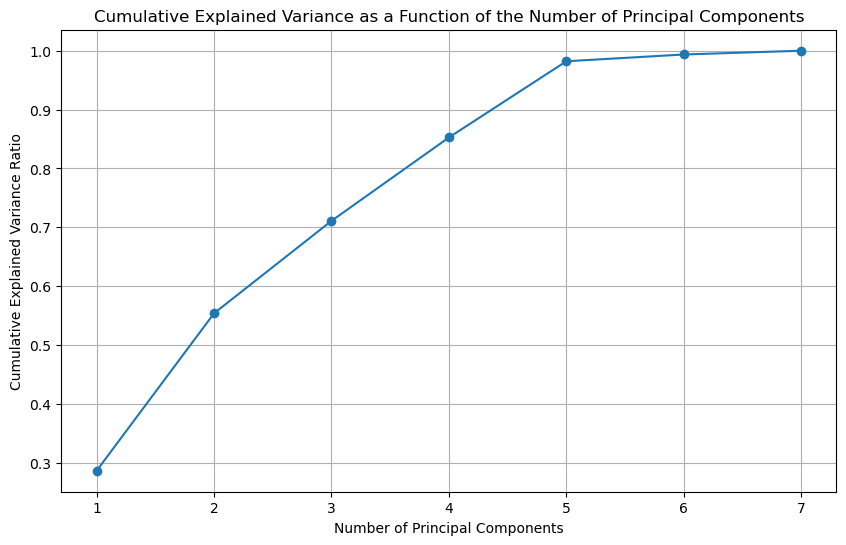

In [184]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance as a Function of the Number of Principal Components')
plt.grid(True)
plt.show()

**D8 (b) Finding the number of principal components necessary to preserve at least 90% of the variance:**

In [185]:
n_components_90_variance = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f'Number of principal components to preserve at least 90% variance: {n_components_90_variance}')

Number of principal components to preserve at least 90% variance: 5


**D8 (c) Training a LR model using the selected number of principal components:**

In [186]:
# Use the number of components determined
pca_90 = PCA(n_components=n_components_90_variance, random_state=5508)
X_train_pca_90 = pca_90.fit_transform(X_train_scaled)
X_test_pca_90 = pca_90.transform(X_test_scaled)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_pca_90, y_train)

# Predict RMSE
y_train_pred = lr.predict(X_train_pca_90)
y_test_pred = lr.predict(X_test_pca_90)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE on training set: {rmse_train}')
print(f'RMSE on test set: {rmse_test}')

RMSE on training set: 0.8058705407640098
RMSE on test set: 1.339414406994616


**D8 (d) Using GridSerachCV to find optimal number of principal components according to a 10-fold cross-validation:**

In [187]:
# Define a pipeline
pipeline = Pipeline([
    ('pca', PCA(random_state=5508)),
    ('lr', LinearRegression())
])

# Define the parameter grid
param_grid = {
    'pca__n_components': range(1, X_train_scaled.shape[1] + 1)
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Extract the best parameters and results
best_n_components = grid_search.best_params_['pca__n_components']
best_rmse_train =np.sqrt(mean_squared_error(y_train, grid_search.predict(X_train_scaled)))
best_rmse_test = np.sqrt(mean_squared_error(y_test, grid_search.predict(X_test_scaled)))

print(f'Optimal number of principal components: {best_n_components}')
print(f'RMSE on training set: {best_rmse_train}')
print(f'RMSE on test set: {best_rmse_test}')

Optimal number of principal components: 7
RMSE on training set: 0.7189383142730591
RMSE on test set: 1.1783865331169299


**D9 (a) Hierarchical Clustering without Standardization:**

In [188]:
#Perfoming standardisation, can be used for D9 (b)
d3_N = data3_Numerical.drop('medianHouseValue',axis=1)
data3Numerical_scaled = scaler.fit_transform(d3_N)

# Hierarchical clustering with average linkage and Euclidean distance
Z = linkage(d3_N, method='average', metric='euclidean')

# Cut dendrogram to form four clusters
clusters = fcluster(Z, t=4, criterion='maxclust')

# Add cluster labels to the original data
d3_N['Cluster'] = clusters

# Calculate mean of variables for each cluster
cluster_means = d3_N.groupby('Cluster').mean()
print(cluster_means)

# Size of each cluster
cluster_sizes = d3_N['Cluster'].value_counts()
print(cluster_sizes)

          longitude   latitude  housingMedianAge  medianIncome  meanRooms  \
Cluster                                                                     
1       -120.605000  37.865000         41.000000      4.890900   7.109890   
2       -119.569411  35.631367         28.636364      3.870154   5.428809   
3       -121.150000  38.690000         52.000000      6.135900   8.275862   
4       -121.980000  38.320000         45.000000     10.226400   3.166667   

         meanBedrooms  meanOccupation  
Cluster                                
1            1.225275      551.087912  
2            1.096655        2.946435  
3            1.517241      230.172414  
4            0.833333     1243.333333  
Cluster
2    20636
1        2
3        1
4        1
Name: count, dtype: int64


**D9 (b) Hierarchical Clustering with Standardization:**

In [189]:
# Hierarchical clustering with average linkage and Euclidean distance on scaled data
Z_scaled = linkage(data3Numerical_scaled, method='average', metric='euclidean')

# Cut dendrogram to form four clusters
clusters_scaled = fcluster(Z_scaled, t=4, criterion='maxclust')

# Add cluster labels to the scaled data
data3Numerical_scaled_df = pd.DataFrame(d3_N, columns=d3_N.columns[:-1])
data3Numerical_scaled_df['Cluster'] = clusters_scaled

# Calculate mean of variables for each cluster
cluster_means_scaled = data3Numerical_scaled_df.groupby('Cluster').mean()
print(cluster_means_scaled)

# Size of each cluster
cluster_sizes_scaled = data3Numerical_scaled_df['Cluster'].value_counts()
print(cluster_sizes_scaled)

          longitude   latitude  housingMedianAge  medianIncome   meanRooms  \
Cluster                                                                      
1       -120.090000  38.855000         33.500000      3.250000  137.221212   
2       -120.605000  37.865000         41.000000      4.890900    7.109890   
3       -119.569437  35.631202         28.637024      3.870324    5.416173   
4       -121.980000  38.320000         45.000000     10.226400    3.166667   

         meanBedrooms  meanOccupation  
Cluster                                
1           29.851515        2.563636  
2            1.225275      551.087912  
3            1.093888        2.957484  
4            0.833333     1243.333333  
Cluster
3    20635
1        2
2        2
4        1
Name: count, dtype: int64


**D9 (c) K-means Clustering with Initial Centroids from Hierarchical Clustering:**

In [190]:
# Initial centroids from hierarchical clustering means
initial_centroids = cluster_means_scaled.values

# K-means clustering with k=4
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=5508)
kmeans.fit(data3Numerical_scaled)
#Incrementing by one so that cluster numbers are uniform throughout
clusters_kmeans = kmeans.labels_ + 1 
#Removing old Cluster data
d3_N = d3_N.drop('Cluster',axis=1)
#adding the recent cluster data
d3_N['KMeans_Cluster'] = clusters_kmeans

# cluster centers
kmeans_centers_means = d3_N.groupby('KMeans_Cluster').mean()
print(kmeans_centers_means)

# cluster sizes
kmeans_cluster_sizes = pd.Series(clusters_kmeans).value_counts()
print(kmeans_cluster_sizes)

                 longitude   latitude  housingMedianAge  medianIncome  \
KMeans_Cluster                                                          
1              -121.980000  38.320000         45.000000     10.226400   
2              -120.080000  38.800000         34.000000      4.625000   
3              -119.569537  35.631419         28.638223      3.870423   
4              -120.100000  38.910000         33.000000      1.875000   

                 meanRooms  meanBedrooms  meanOccupation  
KMeans_Cluster                                            
1                 3.166667      0.833333     1243.333333  
2               132.533333     34.066667        2.400000  
3                 5.416337      1.093901        3.010605  
4               141.909091     25.636364        2.727273  
3    20637
4        1
2        1
1        1
Name: count, dtype: int64


**D9 (d) Hierarchical Clustering on PCA Components:**

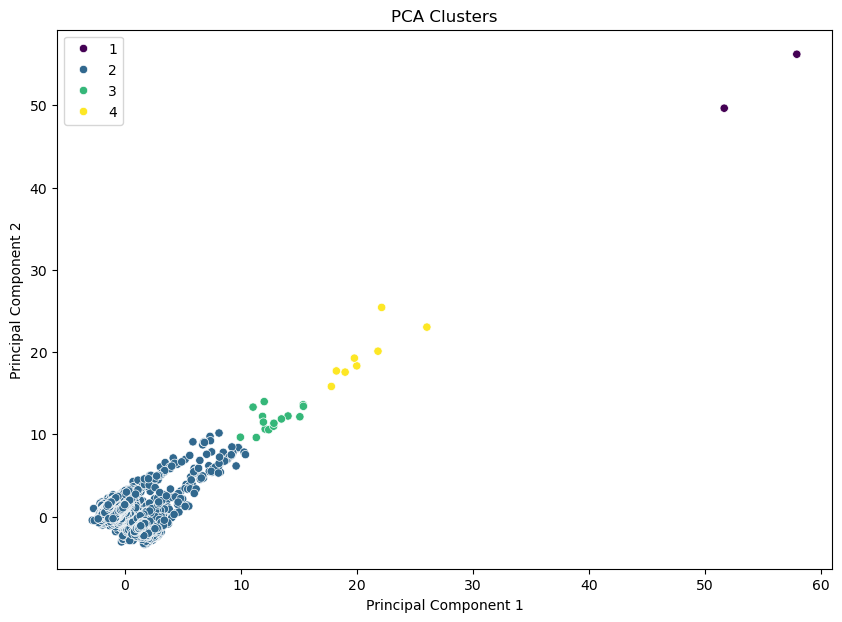

In [81]:
# Perform PCA
pca = PCA(n_components=2, random_state=5508)
data3Numerical_pca = pca.fit_transform(data3Numerical_scaled)

# Hierarchical clustering on PCA components
Z_pca = linkage(data3Numerical_pca, method='average', metric='euclidean')

# Cut dendrogram to form four clusters
clusters_pca = fcluster(Z_pca, t=4, criterion='maxclust')

# Scatter plot of PCA components with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data3Numerical_pca[:, 0], y=data3Numerical_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title("PCA Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**D9 (e) K-means Clustering on PCA Components:**

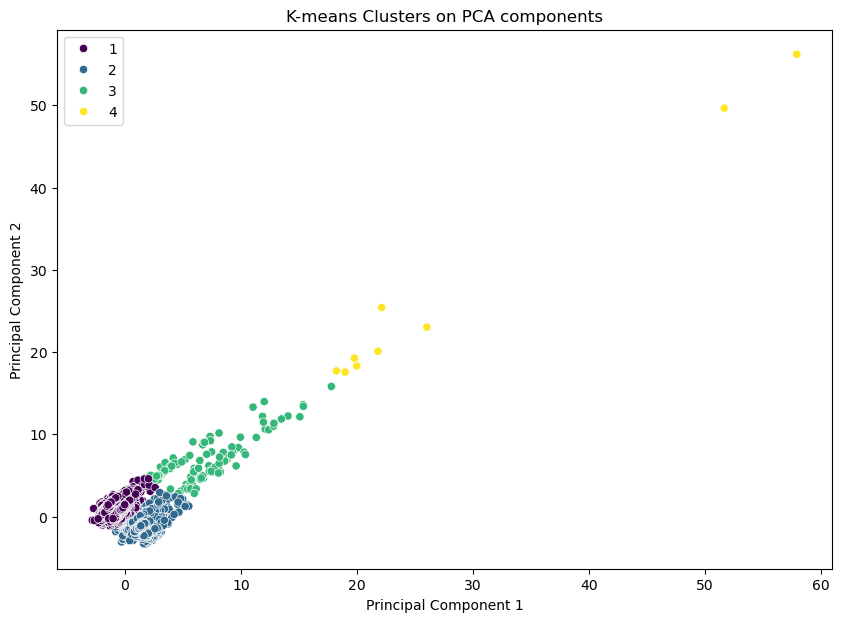

In [82]:
# K-means clustering on PCA components with k=4
kmeans_pca = KMeans(n_clusters=4, random_state=5508)
kmeans_pca.fit(data3Numerical_pca)
#Incrementing by one so that cluster numbers are uniform throughout
clusters_kmeans_pca = kmeans_pca.labels_ + 1

# Scatter plot of PCA components with K-means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data3Numerical_pca[:, 0], y=data3Numerical_pca[:, 1], hue=clusters_kmeans_pca, palette='viridis')
plt.title("K-means Clusters on PCA components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**D10 (a): Silhouette Score for Different k Values**

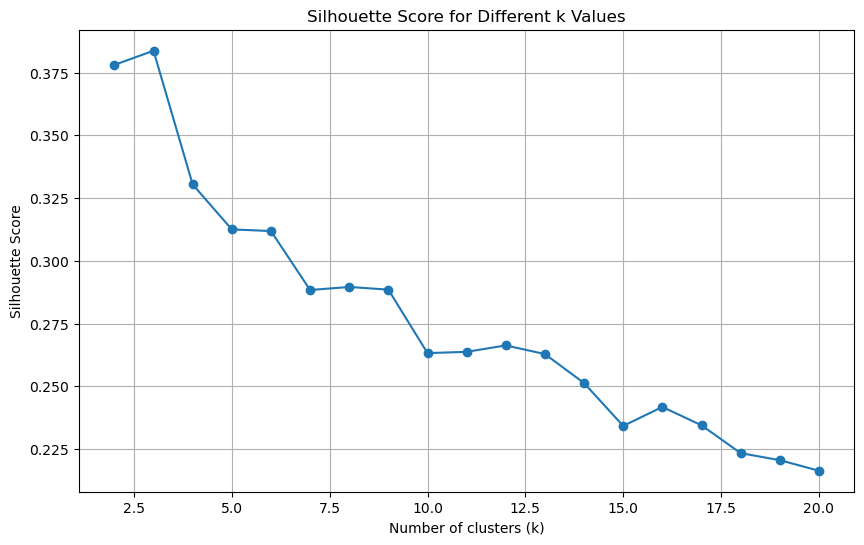

The optimal number of clusters (k) according to the silhouette score is: 3


In [191]:
#data3_Numerical = data3_Numerical.drop('Cluster',axis=1)

# Standardize the features to have zero mean and unit standard deviation
data3_Numerical_Scaled = scaler.fit_transform(data3_Numerical.drop('medianHouseValue',axis=1))

# Range of k values to evaluate
k_values = range(2, 21)
silhouette_scores = []

# Compute silhouette scores for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5508)
    cluster_labels = kmeans.fit_predict(data3_Numerical_Scaled)
    score = silhouette_score(data3_Numerical_Scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

# Determine the optimal k value
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) according to the silhouette score is: {optimal_k}")

**D10 (b): Plotting the k Groups on the First Two Principal Components**

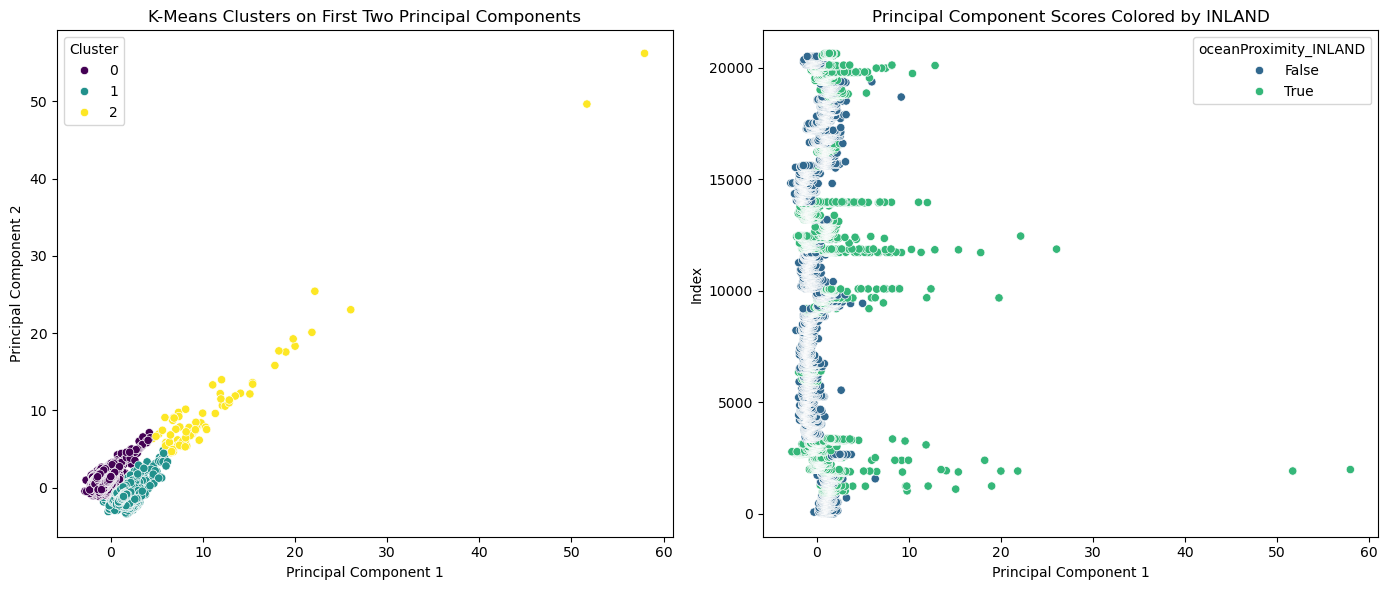

In [204]:
# Perform PCA to reduce the data to the first two principal components
pca = PCA(n_components=2, random_state=5508)
data3_pca = pca.fit_transform(data3_Numerical_Scaled)

# Perform k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=5508)
clusters_optimal = kmeans_optimal.fit_predict(data3_Numerical_Scaled)

# Add cluster labels to the DataFrame
data3_Numerical['Cluster'] = clusters_optimal
data3_Numerical['PCA1'] = data3_pca[:, 0]
data3_Numerical['PCA2'] = data3_pca[:, 1]
#data3_Numerical = data3_Numerical.drop('medianHouseValue',axis=1)
# Plot K-means clusters on the first two principal components
plt.figure(figsize=(14, 6))

# K-means clusters plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data3_Numerical, legend='full')
plt.title('K-Means Clusters on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Principal component scores colored by INLAND
plt.subplot(1, 2, 2)
# Replace 'oceanProximity_INLAND' with the categorical variable you want to visualize
sns.scatterplot(x='PCA1', y=data3_Numerical.index, hue=data3['oceanProximity_INLAND'], palette='viridis', data=data3_Numerical, legend='full')
plt.title('Principal Component Scores Colored by INLAND')
plt.xlabel('Principal Component 1')
plt.ylabel('Index')

plt.tight_layout()
plt.show()
